# Gaussian RBF Kernel

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs, make_moons
from matplotlib import style
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

In [2]:
X, y = make_moons(n_samples=2000)

In [3]:
X[0:10]

array([[ 1.90861984,  0.08237579],
       [ 0.67703799,  0.73594807],
       [ 0.99213824, -0.4999691 ],
       [ 0.54979626, -0.39292586],
       [-0.17364818,  0.98480775],
       [ 0.45707641, -0.3397821 ],
       [-0.81779696,  0.57550685],
       [ 1.86206776, -0.00679303],
       [-0.87147613,  0.49043793],
       [ 0.9999555 ,  0.00943407]])

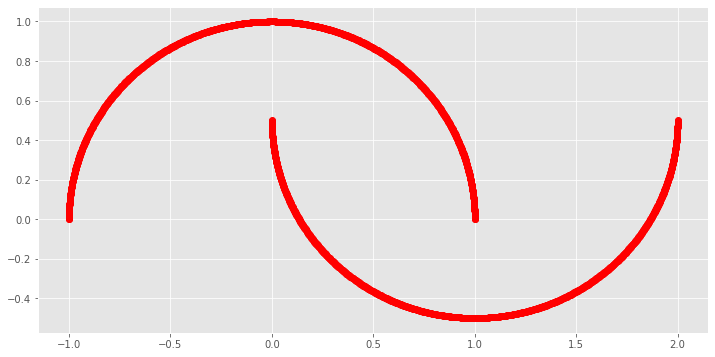

In [4]:
plt.plot(X[:,0],X[:,1],'ro')
plt.show()

In [5]:
# Auto gamma equals 1/n_features
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

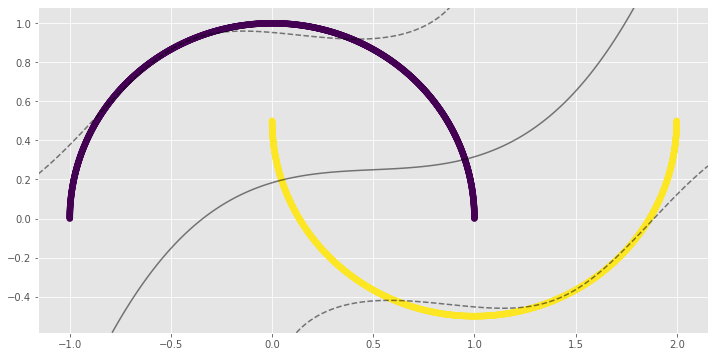

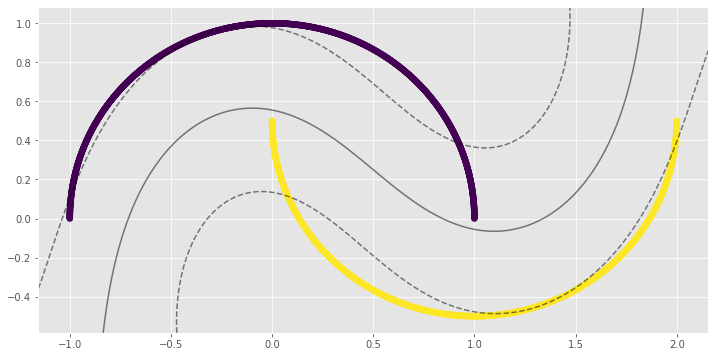

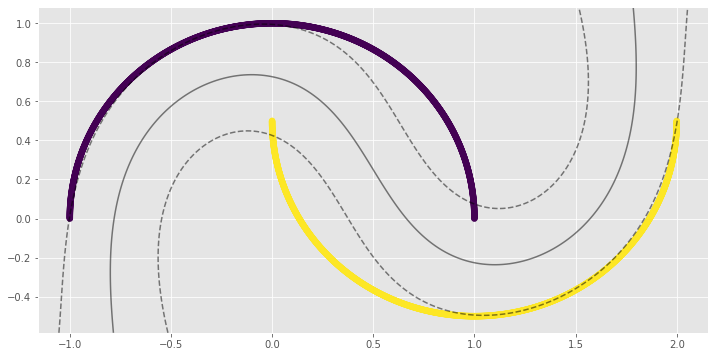

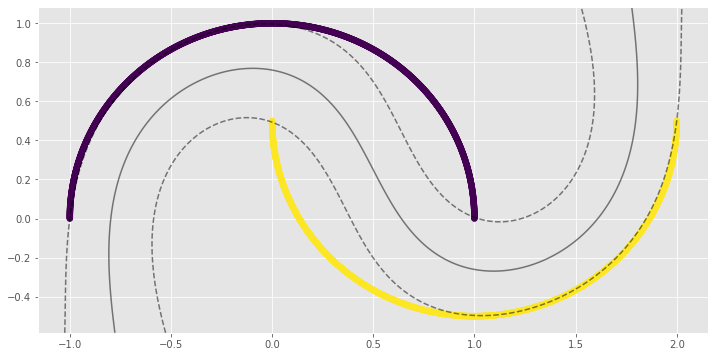

0.902
1.0
1.0
1.0


In [6]:
clf_arr = []
clf_arr.append(draw_svm(X, y, 0.01))
clf_arr.append(draw_svm(X, y, 0.1))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))

for i, clf in enumerate(clf_arr):
    print(clf.score(X, y))